In [1]:
#START

In [2]:
#LIBRARY and import the merged data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('0_Merged.csv')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,36,0,Married,"10,53"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",Yoghurt,44,1,Married,"14,58"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,27,1,Single,"0,18"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,48,1,Married,"12,57"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Yoghurt,33,0,Married,"6,95"


In [5]:
#QUERY 1 : what is the average age of customers if seen from marital status?
customer = pd.read_csv('Customer.csv', delimiter=";")
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [6]:
customer["Marital Status"].value_counts()

Married    340
Single     104
Name: Marital Status, dtype: int64

In [7]:
customer["Marital Status"].isna().sum()

3

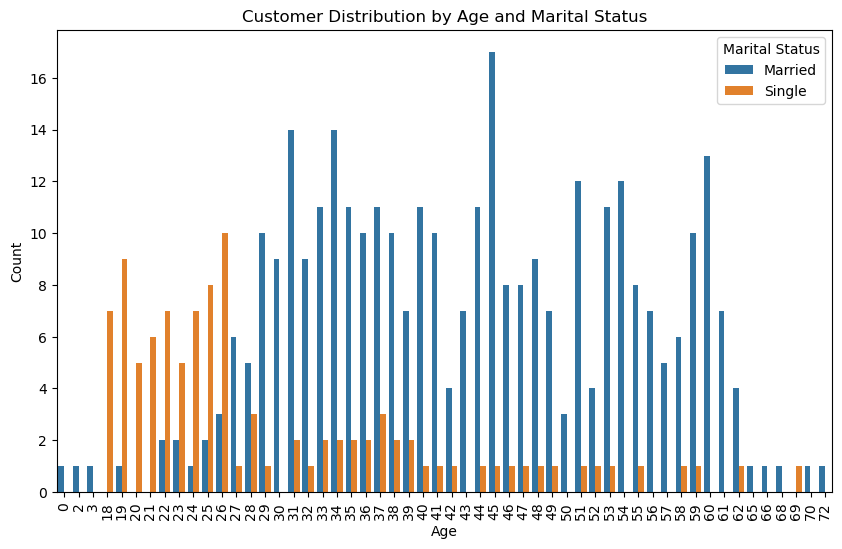

In [11]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot using Seaborn
sns.countplot(data=customer, x='Age', hue='Marital Status')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Customer Distribution by Age and Marital Status')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

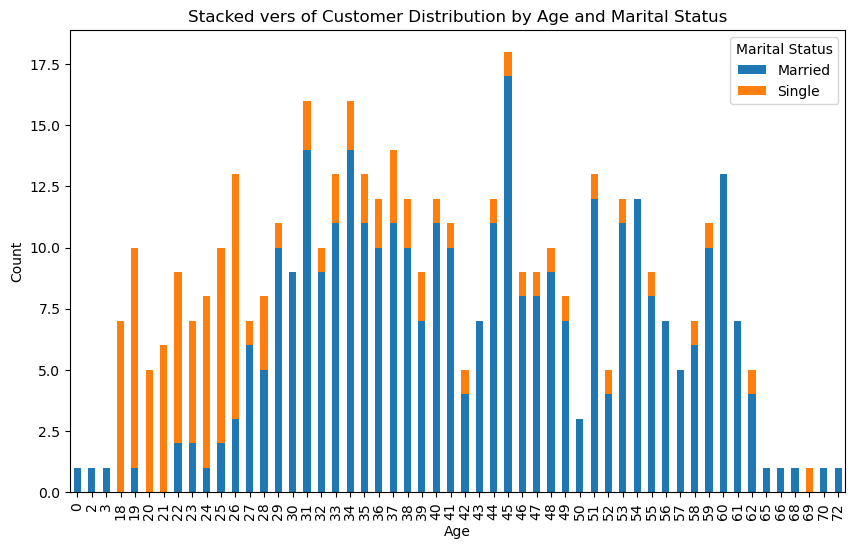

In [38]:
# Group the data by age and marital status and count the occurrences
grouped_data = customer.groupby(['Age', 'Marital Status']).size().unstack()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the stacked bar plot
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Stacked vers of Customer Distribution by Age and Marital Status')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

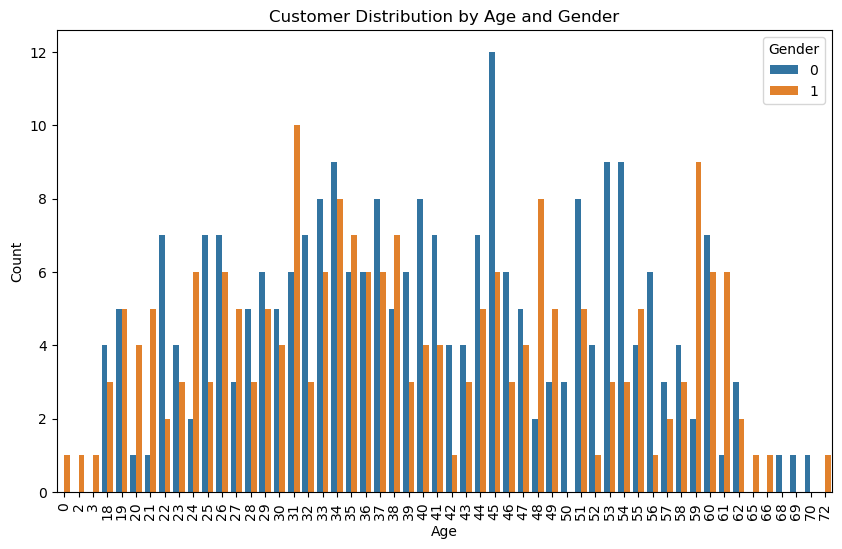

In [16]:
#QUERY 2 : what is the average age of customers if looking at the gender?
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot using Seaborn
sns.countplot(data=customer, x='Age', hue='Gender')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Customer Distribution by Age and Gender')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

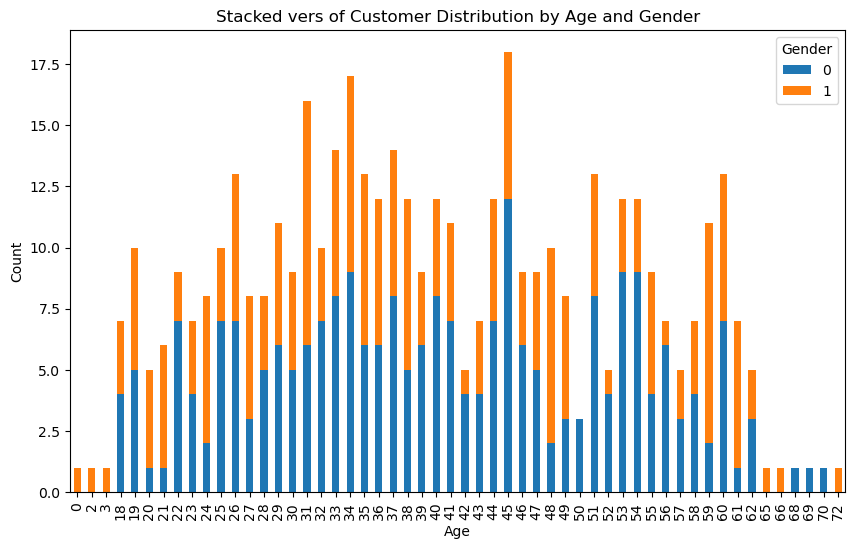

In [37]:
# Group the data by age and marital status and count the occurrences
grouped_data = customer.groupby(['Age', 'Gender']).size().unstack()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the stacked bar plot
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Stacked vers of Customer Distribution by Age and Gender')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [18]:
# Umur rata rata yang gendernya wanita
customer[customer["Gender"]==0]["Age"].mean()

40.32644628099174

In [19]:
# Umur rata rata yang gendernya pria
customer[customer["Gender"]==1]["Age"].mean()

39.141463414634146

In [20]:
#QUERY 3 : specify store name with total largest quantity!
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,36,0,Married,"10,53"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",Yoghurt,44,1,Married,"14,58"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,27,1,Single,"0,18"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,48,1,Married,"12,57"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Yoghurt,33,0,Married,"6,95"


C:\Users\fara\AppData\Local\Temp\ipykernel_55420\2728727094.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("StoreName").sum()["Qty"].sort_values(ascending=False).plot(kind='bar', color='orange')


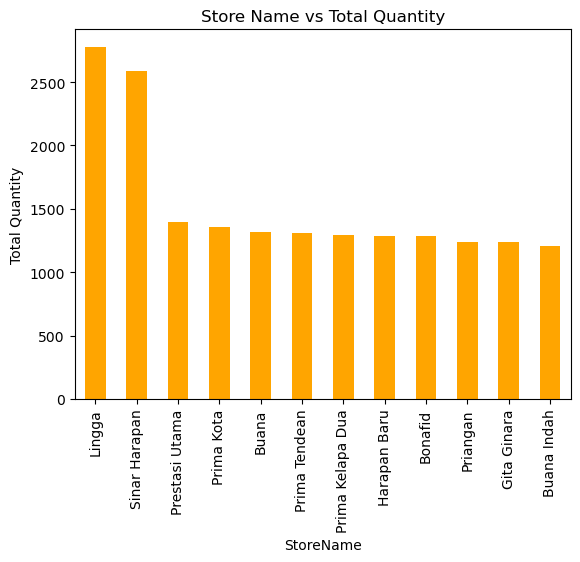

In [35]:
plt.title("Store Name vs Total Quantity")
df.groupby("StoreName").sum()["Qty"].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.ylabel("Total Quantity")
plt.show()

C:\Users\fara\AppData\Local\Temp\ipykernel_55420\2363655969.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("GroupStore").sum()["Qty"].sort_values(ascending=False).plot(kind='bar', color='orange')


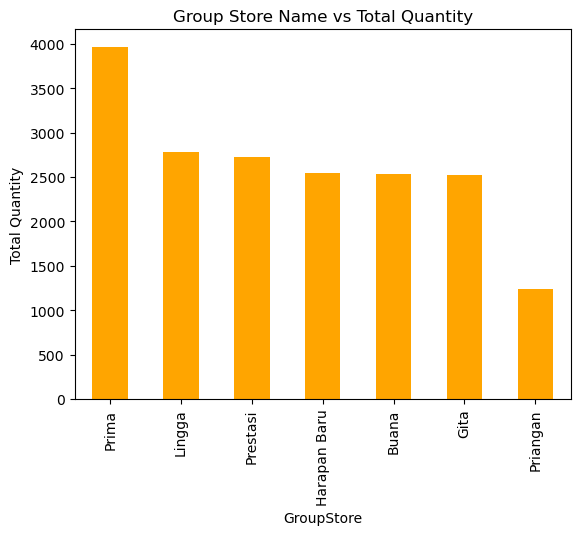

In [34]:
plt.title("Group Store Name vs Total Quantity")
df.groupby("GroupStore").sum()["Qty"].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.ylabel("Total Quantity")
plt.show()

In [25]:
#QUERY 4 : specify the name of the best-selling product with the highest total amount!
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,36,0,Married,"10,53"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",Yoghurt,44,1,Married,"14,58"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,27,1,Single,"0,18"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,48,1,Married,"12,57"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Yoghurt,33,0,Married,"6,95"


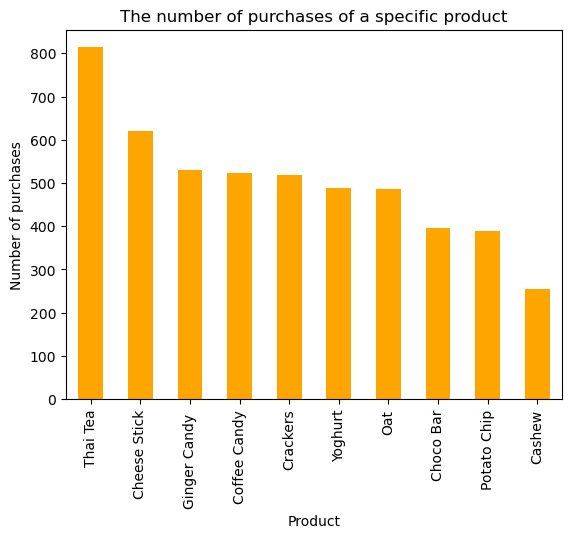

In [33]:
plt.title("The number of purchases of a specific product")
plt.ylabel("Number of purchases")
plt.xlabel("Product")
df["Product Name"].value_counts().plot(kind="bar", color = 'orange')
# Calculate the value counts of each product
product_counts = df["Product Name"].value_counts()

C:\Users\fara\AppData\Local\Temp\ipykernel_55420\340297079.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_amounts = df.groupby('Product Name').sum()["TotalAmount"]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Thai Tea'),
  Text(1, 0, 'Cheese Stick'),
  Text(2, 0, 'Ginger Candy '),
  Text(3, 0, 'Coffee Candy'),
  Text(4, 0, 'Crackers'),
  Text(5, 0, 'Yoghurt'),
  Text(6, 0, 'Oat'),
  Text(7, 0, 'Choco Bar'),
  Text(8, 0, 'Potato Chip'),
  Text(9, 0, 'Cashew')])

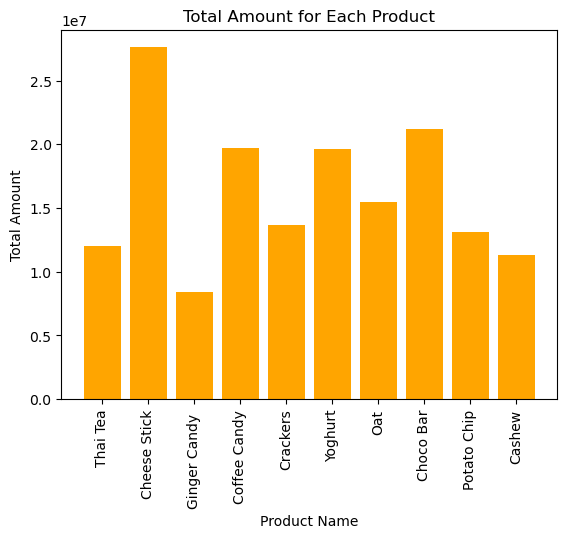

In [32]:
product_counts = df["Product Name"].value_counts()
total_amounts = df.groupby('Product Name').sum()["TotalAmount"]
sorted_total_amounts = total_amounts.reindex(product_counts.index.tolist())

plt.bar(sorted_total_amounts.index, sorted_total_amounts, color = 'orange')
plt.xlabel('Product Name')
plt.ylabel('Total Amount')
plt.title('Total Amount for Each Product')
plt.xticks(rotation=90)

In [30]:
#FINISH